In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import ipywidgets as widgets
import numpy as np
import pandas as pd

plt.style.use('seaborn-pastel')

In [2]:
##EQUATIONS OF MOTION##
x = lambda A, omega, t: A*np.cos(omega*t)                #Position x(t)
v = lambda A, omega, t: -A*omega*np.sin(omega*t)         #Velocity v(t)
a = lambda A, omega, t: -A*omega**2*np.cos(omega*t)      #Acceleration a(t)
j = lambda A, omega, t: A*omega**3*np.sin(omega*t)       #Jerk j(t)

##ENERGY EQUATIONS##
U = lambda k, x: 0.5*k*x**2     #Potential Energy
K = lambda m, v: 0.5*m*v**2     #Kinetic Energy
E = lambda A, k: 0.5*k*A**2     #Total System Energy

##TIME DEPENDENT ENERGY EQUATIONS##
A_t = lambda y_max, m, b, t: y_max*np.exp(-(b*t)/(2*m))     #Amplitude with damping
U_t = lambda k, A, omega, t: 0.5*k*x(A, omega, t)**2        #Potential Energy U(t)
K_t = lambda m, A, omega, t: 0.5*m*v(A, omega, t)**2        #Kinetic Energy K(t)

##DAMPING EQUATIONS
w_d = lambda k, m, b: np.sqrt((k/m)-(b**2)/(4*m**2))     #Damped angular frequency

<IPython.core.display.Javascript object>


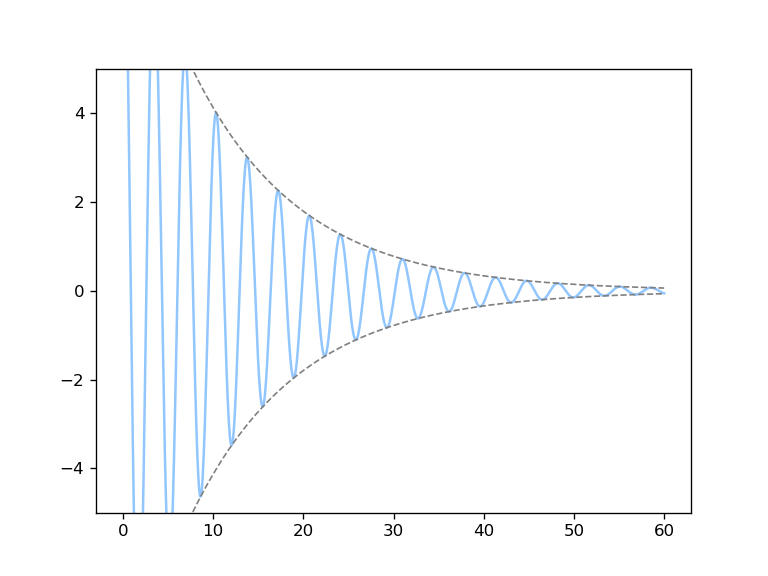

interactive(children=(FloatSlider(value=5.0, description='A', max=10.0, step=0.5), IntSlider(value=25, descrip…

<function __main__.update(A=(0, 10, 0.5), k=(1, 50, 1), m=(0.05, 3, 0.05), b=(0, 3, 0.05))>

In [3]:
time = np.linspace(0, 60, 1000) #1000 time intervals between 0 and 60 sec

fig, ax = plt.subplots()
func_line, = ax.plot(time, np.zeros_like(time))
env_line, = ax.plot(time, np.zeros_like(time), '--', color='grey', linewidth=1)
env_line2, = ax.plot(time, np.zeros_like(time), '--', color='grey', linewidth=1)
ax.set_ylim(-5, 5)

def update(A=(0,10,.5), k=(1,50, 1), m=(0.05,3,0.05), b=(0,3,0.05)):
    
    
    func_line.set_ydata([A_t(A, m, b, t)*np.cos(w_d(k, m, b)*t) for t in time])
    env_line.set_ydata([A_t(A, m, b, t) for t in time])
    env_line2.set_ydata([-A_t(A, m, b, t) for t in time])
    fig.canvas.draw_idle()
    
    
widgets.interact(update)

In [4]:
T = lambda L, g: 2*np.pi*np.sqrt(L/g)
omega = lambda L, g: np.sqrt(g/L)
theta = lambda A, L, g, t: A*np.sin(np.sqrt(g/L)*t)

pulse_y = lambda A, x_pos, t: A/((x_pos - t)**2 + abs(A))
wave_y = lambda A, k, x, omega, t: A*np.sin(k*x - omega*t)

#y(x,t)=2Asin(kx)cos(ωt)
standing = lambda A, k, x, omega, t: 2*A*np.sin(k*x)*np.cos(omega*t)

#Velocity is the square root of Tension divided by the mass density of the rope (mass/length)
v = lambda m, mu: np.sqrt((m*9.81)/mu)

#Lambda is (2*Length)/(Number of waves)
lam = lambda L, n: (2*L)/n

#Frequency is velocity/lambda
freq = lambda v, lam: v/lam

<IPython.core.display.Javascript object>


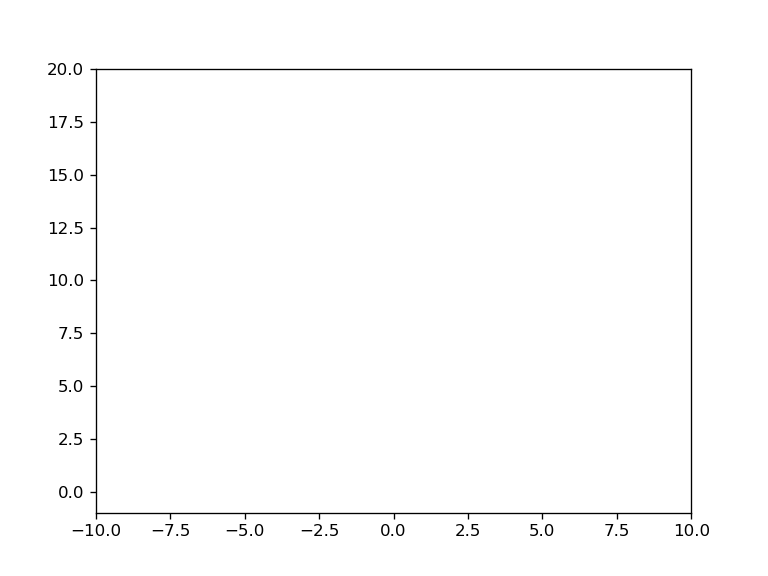

In [51]:
fig2, ax2 = plt.subplots()
ax2.set_ylim(-1, 20)
ax2.set_xlim(-10, 10)
line, = ax2.plot([],[], lw=3)
line2, = ax2.plot([],[], lw=3, color='lightgreen')
line3, = ax2.plot([],[], lw=3, color='violet')

x = np.linspace(-100,100,2000)

def init():
    line.set_data([],[])
    line2.set_data([],[])
    line3.set_data([],[])

def animate(i):

    y = [pulse_y(-1*np.cos(i/10), x, 10*np.sin(i/10))+2]
    y2 = [wave_y(1, 2*np.pi/20, x, 1/5, i)+7]
    y3 = 2*np.sin((np.pi/(2*5))*x)*np.cos(np.pi/(2*5)*i)+12
    line.set_data(x, y)
    line2.set_data(x, y2)
    line3.set_data(x, y3)
    
#anim = FuncAnimation(fig2, animate, init_func=init, interval=20, blit=True)

# ax2.plot(time, [wave_y(1, x, 0) for x in time])

3.24